## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>**

**This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset we use for this part is a small animal dataset consisting of $5,000$ images of cats, dogs, fishes, lions, chickens, elephants, butterflies, cows, spiders, and horses, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement for building your CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [1]:
%load_ext autoreload
%autoreload 2

Install the package `imutils` if you have not installed yet

In [2]:
! pip install imutils

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [5]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [6]:
label_folder_dict= create_label_folder_dict("./datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process the experimental data. 

In [7]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [8]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(4000, 32, 32, 3) (4000,)
(500, 32, 32, 3) (500,)
(500, 32, 32, 3) (500,)
['butterfiles' 'cats' 'chickens' 'cows' 'dogs' 'elephants' 'fishes'
 'horses' 'lions' 'spiders']


We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [9]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [10]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [11]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Epoch 1/20
63/63 [==============================] - 4s 67ms/step - loss: 2.3302 - accuracy: 0.1260 - val_loss: 2.3076 - val_accuracy: 0.0880
Epoch 2/20
63/63 [==============================] - 4s 66ms/step - loss: 2.3059 - accuracy: 0.0970 - val_loss: 2.3057 - val_accuracy: 0.0880
Epoch 3/20
63/63 [==============================] - 4s 67ms/step - loss: 2.2985 - accuracy: 0.1042 - val_loss: 2.3066 - val_accuracy: 0.0940
Epoch 4/20
63/63 [==============================] - 4s 67ms/step - loss: 2.2924 - accuracy: 0.1203 - val_loss: 2.3084 - val_accuracy: 0.0880
Epoch 5/20
63/63 [==============================] - 4s 68ms/step - loss: 2.3056 - accuracy: 0.0920 - val_loss: 2.3049 - val_accuracy: 0.0900
Epoch 6/20
63/63 [==============================] - 4s 67ms/step - loss: 2.3049 - accuracy: 0.0957 - val_loss: 2.3030 - val_accuracy: 0.1120
Epoch 7/20
63/63 [==============================] - 4s 67ms/step - loss: 2.3047 - accuracy: 0.0938 - val_loss: 2.3041 - val_accuracy: 0.1060
Epoch 8/20
63

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [12]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 0s 10ms/step - loss: 2.3049 - accuracy: 0.1080


0.1080000028014183

Below shows how you can inspect the training progress.

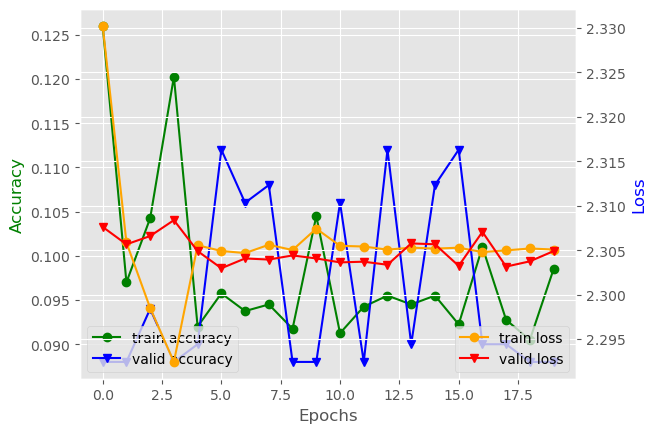

In [13]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [14]:
network1.predict(data_manager.X_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

<Figure size 640x480 with 0 Axes>

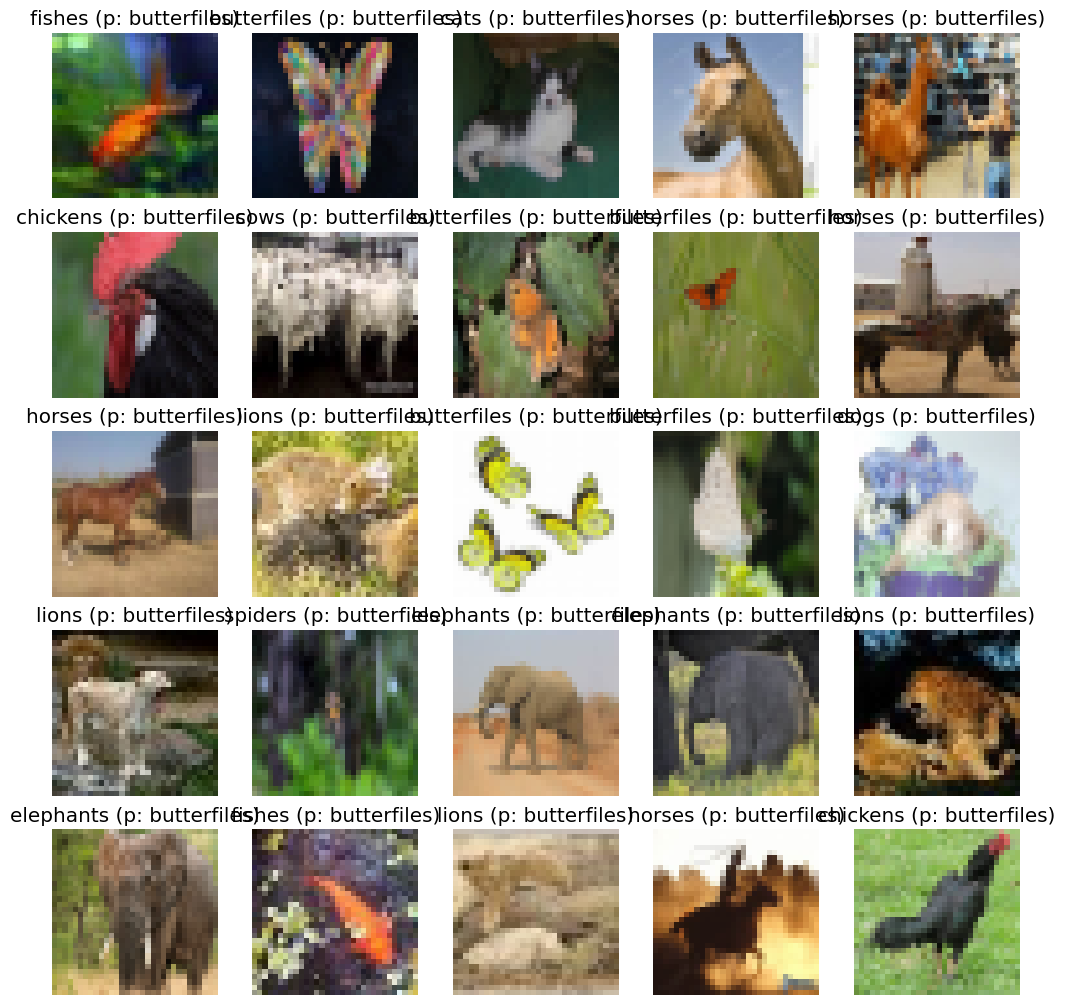

In [15]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red">**Question 3.1**</span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

From the output of the model and the accuracy and loss curves, we can see that this model's learning effect is not satisfactory. For this model, the learning rate is set to 0.5, it is too high for the deep learing model, so to make a better model we can reducing the learning rate.



**For questions 3.2 to 3.9, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block. 

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [49]:
tf.random.set_seed(1234)

<span style="color:red">**Question 3.2**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below. Note that the `YourModel` class   is inherited from the `DefaultModel` class.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
from keras.layers import Input, Dense, Add   
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)

    def build_cnn(self):
            #Insert your code here
            def conv(x, filters):
                return layers.Conv2D(filters, (3,3), padding='same')(x)
            
            def bn(x):
                ...
            
            inputs=Input(shape=(32, 32, 3))
            for i in range(self.num_blocks):
                if i==0:
                    M=conv(inputs, self.feature_maps[i])
                    # M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(inputs)
                    x=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(inputs)
                else:
                    M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
                    x=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
                if self.batch_norm:
                    M=layers.BatchNormalization(momentum=0.9)(M)
                    M=layers.Activation(self.activation_func)(M)
                    M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
                    y=layers.BatchNormalization(momentum=0.9)(M)
                    M=layers.BatchNormalization(momentum=0.9)(M)
                    if self.use_skip:
                        x=layers.Add()([x, y])
                        M=layers.Activation(self.activation_func)(x)
                        M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                        M=layers.Dropout(rate=self.drop_rate)(M)
                if not self.batch_norm:
                    z=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
                    if self.use_skip:
                        x=layers.Add()([x, z])
                        M=layers.Activation(self.activation_func)(x)
                        M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                        M=layers.Dropout(rate=self.drop_rate)(M)
            M=layers.Flatten()(M)
            M=layers.Dense(self.num_classes, activation='softmax')(M)
            self.model=M
            self.model=tf.keras.Model(inputs,M)
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            

: 

<span style="color:red">**Question 3.3**</span> **Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.**
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

#*Write your report and observation here*

After running two different cases, we found that for both skip connection and no skip connection, the testing accuracy is lower than the train accuracy. So they are both overfitting, but the testing accuracy of use skip coinnection is better than not use.




In [51]:
our_network_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_skip.build_cnn()
our_network_skip.summary()

Model: "functional_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_134 (Conv2D)             (None, 32, 32, 32)   896         input_31[0][0]                   
__________________________________________________________________________________________________
batch_normalization_129 (BatchN (None, 32, 32, 32)   128         conv2d_134[0][0]                 
__________________________________________________________________________________________________
activation_64 (Activation)      (None, 32, 32, 32)   0           batch_normalization_129[0][0]    
______________________________________________________________________________________

In [46]:
our_network_skip.fit(data_manager, batch_size=32, num_epochs=20)
our_network_skip.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 12s 94ms/step - loss: 0.1022 - accuracy: 0.9650 - val_loss: 1.8735 - val_accuracy: 0.6200
Epoch 2/20
125/125 [==============================] - 11s 92ms/step - loss: 0.1032 - accuracy: 0.9653 - val_loss: 2.3320 - val_accuracy: 0.5580
Epoch 3/20
125/125 [==============================] - 11s 89ms/step - loss: 0.1180 - accuracy: 0.9597 - val_loss: 2.1643 - val_accuracy: 0.5740
Epoch 4/20
125/125 [==============================] - 11s 90ms/step - loss: 0.0744 - accuracy: 0.9737 - val_loss: 2.4462 - val_accuracy: 0.5660
Epoch 5/20
125/125 [==============================] - 11s 91ms/step - loss: 0.0389 - accuracy: 0.9870 - val_loss: 2.2153 - val_accuracy: 0.5860
Epoch 6/20
125/125 [==============================] - 11s 90ms/step - loss: 0.0529 - accuracy: 0.9830 - val_loss: 2.5169 - val_accuracy: 0.5960
Epoch 7/20
125/125 [==============================] - 11s 90ms/step - loss: 0.0818 - accuracy: 0.9720 - val_loss: 2.1671 - val_accuracy:

0.6200000047683716

In [52]:
our_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_138 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_70 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_140 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 32, 32, 64)      

In [53]:
our_network_no_skip.fit(data_manager, batch_size=32, num_epochs=20)
our_network_no_skip.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 37s 298ms/step - loss: 18.0666 - accuracy: 0.2457 - val_loss: 20.9411 - val_accuracy: 0.2780
Epoch 2/20
125/125 [==============================] - 38s 306ms/step - loss: 16.1092 - accuracy: 0.3192 - val_loss: 14.3922 - val_accuracy: 0.2840
Epoch 3/20
125/125 [==============================] - 37s 300ms/step - loss: 16.2591 - accuracy: 0.3685 - val_loss: 11.2787 - val_accuracy: 0.3840
Epoch 4/20
125/125 [==============================] - 37s 297ms/step - loss: 11.4490 - accuracy: 0.4358 - val_loss: 11.7622 - val_accuracy: 0.3340
Epoch 5/20
125/125 [==============================] - 37s 294ms/step - loss: 9.1843 - accuracy: 0.4805 - val_loss: 10.3430 - val_accuracy: 0.3580
Epoch 6/20
125/125 [==============================] - 37s 298ms/step - loss: 9.0349 - accuracy: 0.5153 - val_loss: 12.9028 - val_accuracy: 0.4020
Epoch 7/20
125/125 [==============================] - 37s 296ms/step - loss: 6.9266 - accuracy: 0.5845 - val_loss: 9.814

0.4620000123977661

<span style="color:red">**Question 3.4**</span> **Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.**
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Report the best parameters and the testing accuracy here*

The best model will be num_block=4, use_skip=True, learning rate=0.001

In [54]:
#Insert your code here. You can add more cells if necessary
best_val_accuracy = 0
best_hparam = None

for num_blocks in [2, 3, 4]:
    for use_skip in [True, False]:
        for learning_rate in [0.001, 0.0001]:
            Model_1 = YourModel(name='network1',
                                feature_maps=32,
                                num_classes=len(data_manager.classes),
                                num_blocks=num_blocks,
                                drop_rate= 0.0, 
                                batch_norm=True, 
                                use_skip = use_skip,
                                optimizer='adam',
                                learning_rate= learning_rate)
            Model_1.build_cnn()
            Model_1.fit(data_manager, batch_size=32, num_epochs=20)
            val_accuracy: float = Model_1.compute_accuracy(data_manager.X_test, data_manager.y_test)
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_hparam = [num_blocks, use_skip, learning_rate]

print(best_hparam)

Epoch 1/20
125/125 [==============================] - 9s 72ms/step - loss: 1.9112 - accuracy: 0.3490 - val_loss: 1.6015 - val_accuracy: 0.4240
Epoch 2/20
125/125 [==============================] - 9s 71ms/step - loss: 1.4353 - accuracy: 0.5167 - val_loss: 1.4869 - val_accuracy: 0.5120
Epoch 3/20
125/125 [==============================] - 8s 66ms/step - loss: 1.1197 - accuracy: 0.6192 - val_loss: 1.4245 - val_accuracy: 0.4960
Epoch 4/20
125/125 [==============================] - 9s 68ms/step - loss: 0.8681 - accuracy: 0.7113 - val_loss: 1.3499 - val_accuracy: 0.5500
Epoch 5/20
125/125 [==============================] - 8s 67ms/step - loss: 0.6693 - accuracy: 0.7775 - val_loss: 1.4882 - val_accuracy: 0.5440
Epoch 6/20
125/125 [==============================] - 9s 68ms/step - loss: 0.5166 - accuracy: 0.8307 - val_loss: 1.5481 - val_accuracy: 0.5360
Epoch 7/20
125/125 [==============================] - 8s 67ms/step - loss: 0.3895 - accuracy: 0.8702 - val_loss: 1.6246 - val_accuracy: 0.5840

0.5600000023841858

In [55]:
Model_2 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.001)
Model_2.build_cnn()
Model_2.fit(data_manager, batch_size=32, num_epochs=20)
Model_2.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 12s 93ms/step - loss: 1.9032 - accuracy: 0.3442 - val_loss: 1.6072 - val_accuracy: 0.4180
Epoch 2/20
125/125 [==============================] - 12s 92ms/step - loss: 1.4817 - accuracy: 0.4852 - val_loss: 1.5441 - val_accuracy: 0.5000
Epoch 3/20
125/125 [==============================] - 11s 92ms/step - loss: 1.2510 - accuracy: 0.5698 - val_loss: 1.3912 - val_accuracy: 0.5120
Epoch 4/20
125/125 [==============================] - 11s 91ms/step - loss: 1.0033 - accuracy: 0.6605 - val_loss: 1.2341 - val_accuracy: 0.6020
Epoch 5/20
125/125 [==============================] - 12s 93ms/step - loss: 0.8540 - accuracy: 0.7042 - val_loss: 1.3882 - val_accuracy: 0.5720
Epoch 6/20
125/125 [==============================] - 12s 92ms/step - loss: 0.6797 - accuracy: 0.7678 - val_loss: 1.4261 - val_accuracy: 0.5440
Epoch 7/20
125/125 [==============================] - 11s 92ms/step - loss: 0.5099 - accuracy: 0.8217 - val_loss: 1.4301 - val_accuracy:

0.5839999914169312

In [56]:
Model_3 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.001)
Model_3.build_cnn()
Model_3.fit(data_manager, batch_size=32, num_epochs=20)
Model_3.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 14s 112ms/step - loss: 2.0715 - accuracy: 0.2833 - val_loss: 1.8501 - val_accuracy: 0.3300
Epoch 2/20
125/125 [==============================] - 14s 111ms/step - loss: 1.6970 - accuracy: 0.3875 - val_loss: 1.6800 - val_accuracy: 0.3720
Epoch 3/20
125/125 [==============================] - 14s 110ms/step - loss: 1.4840 - accuracy: 0.4840 - val_loss: 1.6351 - val_accuracy: 0.4240
Epoch 4/20
125/125 [==============================] - 14s 110ms/step - loss: 1.3211 - accuracy: 0.5365 - val_loss: 1.5691 - val_accuracy: 0.4380
Epoch 5/20
125/125 [==============================] - 14s 110ms/step - loss: 1.1622 - accuracy: 0.5947 - val_loss: 1.3057 - val_accuracy: 0.5140
Epoch 6/20
125/125 [==============================] - 14s 110ms/step - loss: 1.0219 - accuracy: 0.6425 - val_loss: 1.3553 - val_accuracy: 0.5340
Epoch 7/20
125/125 [==============================] - 14s 111ms/step - loss: 0.8821 - accuracy: 0.6883 - val_loss: 1.4195 - val_ac

0.6159999966621399

In [57]:
Model_4 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=2,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)
Model_4.build_cnn()
Model_4.fit(data_manager, batch_size=32, num_epochs=20)
Model_4.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 15s 117ms/step - loss: 9.0460 - accuracy: 0.2993 - val_loss: 10.1931 - val_accuracy: 0.3140
Epoch 2/20
125/125 [==============================] - 14s 114ms/step - loss: 4.5844 - accuracy: 0.5552 - val_loss: 8.4282 - val_accuracy: 0.3800
Epoch 3/20
125/125 [==============================] - 14s 114ms/step - loss: 1.9927 - accuracy: 0.7452 - val_loss: 8.1738 - val_accuracy: 0.3660
Epoch 4/20
125/125 [==============================] - 14s 115ms/step - loss: 0.7345 - accuracy: 0.8685 - val_loss: 7.6652 - val_accuracy: 0.4140
Epoch 5/20
125/125 [==============================] - 14s 115ms/step - loss: 0.4305 - accuracy: 0.9225 - val_loss: 8.4402 - val_accuracy: 0.3940
Epoch 6/20
125/125 [==============================] - 14s 115ms/step - loss: 0.3909 - accuracy: 0.9245 - val_loss: 8.4052 - val_accuracy: 0.3920
Epoch 7/20
125/125 [==============================] - 14s 115ms/step - loss: 0.2974 - accuracy: 0.9395 - val_loss: 8.9735 - val_a

0.4300000071525574

In [58]:
Model_5 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)
Model_5.build_cnn()
Model_5.fit(data_manager, batch_size=32, num_epochs=20)
Model_5.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 40s 320ms/step - loss: 18.0666 - accuracy: 0.2457 - val_loss: 20.9411 - val_accuracy: 0.2780
Epoch 2/20
125/125 [==============================] - 39s 310ms/step - loss: 16.1092 - accuracy: 0.3192 - val_loss: 14.3922 - val_accuracy: 0.2840
Epoch 3/20
125/125 [==============================] - 38s 302ms/step - loss: 16.2591 - accuracy: 0.3685 - val_loss: 11.2787 - val_accuracy: 0.3840
Epoch 4/20
125/125 [==============================] - 38s 302ms/step - loss: 11.4490 - accuracy: 0.4358 - val_loss: 11.7622 - val_accuracy: 0.3340
Epoch 5/20
125/125 [==============================] - 38s 303ms/step - loss: 9.1843 - accuracy: 0.4805 - val_loss: 10.3430 - val_accuracy: 0.3580
Epoch 6/20
125/125 [==============================] - 38s 303ms/step - loss: 9.0349 - accuracy: 0.5153 - val_loss: 12.9028 - val_accuracy: 0.4020
Epoch 7/20
125/125 [==============================] - 39s 310ms/step - loss: 6.9266 - accuracy: 0.5845 - val_loss: 9.814

0.4620000123977661

In [59]:
Model_6 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)
Model_6.build_cnn()
Model_6.fit(data_manager, batch_size=32, num_epochs=20)
Model_6.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 106s 849ms/step - loss: 40.1133 - accuracy: 0.1883 - val_loss: 19.9473 - val_accuracy: 0.1920
Epoch 2/20
125/125 [==============================] - 106s 846ms/step - loss: 29.0070 - accuracy: 0.2188 - val_loss: 26.9787 - val_accuracy: 0.2160
Epoch 3/20
125/125 [==============================] - 107s 857ms/step - loss: 27.9834 - accuracy: 0.2342 - val_loss: 12.5485 - val_accuracy: 0.1500
Epoch 4/20
125/125 [==============================] - 106s 845ms/step - loss: 27.2998 - accuracy: 0.2385 - val_loss: 31.0109 - val_accuracy: 0.1900
Epoch 5/20
125/125 [==============================] - 106s 846ms/step - loss: 19.0519 - accuracy: 0.2702 - val_loss: 18.9795 - val_accuracy: 0.2680
Epoch 6/20
125/125 [==============================] - 107s 854ms/step - loss: 20.1886 - accuracy: 0.2770 - val_loss: 19.4548 - val_accuracy: 0.2300
Epoch 7/20
125/125 [==============================] - 106s 846ms/step - loss: 14.8483 - accuracy: 0.2870 - val_l

0.28200000524520874

In [60]:
Model_7 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=2,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.0001)
Model_7.build_cnn()
Model_7.fit(data_manager, batch_size=32, num_epochs=20)
Model_7.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 8s 67ms/step - loss: 2.0581 - accuracy: 0.2627 - val_loss: 1.8344 - val_accuracy: 0.3660
Epoch 2/20
125/125 [==============================] - 8s 68ms/step - loss: 1.6696 - accuracy: 0.4207 - val_loss: 1.7107 - val_accuracy: 0.4140
Epoch 3/20
125/125 [==============================] - 8s 67ms/step - loss: 1.5066 - accuracy: 0.4855 - val_loss: 1.5861 - val_accuracy: 0.4500
Epoch 4/20
125/125 [==============================] - 8s 68ms/step - loss: 1.3761 - accuracy: 0.5383 - val_loss: 1.5461 - val_accuracy: 0.4720
Epoch 5/20
125/125 [==============================] - 9s 69ms/step - loss: 1.2664 - accuracy: 0.5735 - val_loss: 1.4944 - val_accuracy: 0.4880
Epoch 6/20
125/125 [==============================] - 9s 68ms/step - loss: 1.1793 - accuracy: 0.6068 - val_loss: 1.4601 - val_accuracy: 0.5000
Epoch 7/20
125/125 [==============================] - 8s 67ms/step - loss: 1.0883 - accuracy: 0.6365 - val_loss: 1.4405 - val_accuracy: 0.5280

0.5640000104904175

In [61]:
Model_8 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.0001)
Model_8.build_cnn()
Model_8.fit(data_manager, batch_size=32, num_epochs=20)
Model_8.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 11s 92ms/step - loss: 1.9274 - accuracy: 0.3225 - val_loss: 1.6668 - val_accuracy: 0.4360
Epoch 2/20
125/125 [==============================] - 11s 91ms/step - loss: 1.4988 - accuracy: 0.4950 - val_loss: 1.5405 - val_accuracy: 0.4900
Epoch 3/20
125/125 [==============================] - 11s 90ms/step - loss: 1.2832 - accuracy: 0.5753 - val_loss: 1.3992 - val_accuracy: 0.5060
Epoch 4/20
125/125 [==============================] - 11s 91ms/step - loss: 1.1217 - accuracy: 0.6252 - val_loss: 1.3379 - val_accuracy: 0.5280
Epoch 5/20
125/125 [==============================] - 11s 91ms/step - loss: 0.9892 - accuracy: 0.6795 - val_loss: 1.3092 - val_accuracy: 0.5500
Epoch 6/20
125/125 [==============================] - 11s 91ms/step - loss: 0.8771 - accuracy: 0.7193 - val_loss: 1.3432 - val_accuracy: 0.5640
Epoch 7/20
125/125 [==============================] - 11s 91ms/step - loss: 0.7735 - accuracy: 0.7592 - val_loss: 1.2484 - val_accuracy:

0.6159999966621399

In [62]:
Model_9 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.0001)
Model_9.build_cnn()
Model_9.fit(data_manager, batch_size=32, num_epochs=20)
Model_9.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 15s 117ms/step - loss: 1.8436 - accuracy: 0.3580 - val_loss: 1.5654 - val_accuracy: 0.4720
Epoch 2/20
125/125 [==============================] - 14s 113ms/step - loss: 1.3771 - accuracy: 0.5332 - val_loss: 1.4445 - val_accuracy: 0.5360
Epoch 3/20
125/125 [==============================] - 14s 113ms/step - loss: 1.1112 - accuracy: 0.6215 - val_loss: 1.3568 - val_accuracy: 0.5300
Epoch 4/20
125/125 [==============================] - 14s 112ms/step - loss: 0.8921 - accuracy: 0.7097 - val_loss: 1.2750 - val_accuracy: 0.5520
Epoch 5/20
125/125 [==============================] - 14s 112ms/step - loss: 0.7197 - accuracy: 0.7692 - val_loss: 1.3382 - val_accuracy: 0.5300
Epoch 6/20
125/125 [==============================] - 14s 112ms/step - loss: 0.5644 - accuracy: 0.8332 - val_loss: 1.3197 - val_accuracy: 0.5540
Epoch 7/20
125/125 [==============================] - 14s 112ms/step - loss: 0.4218 - accuracy: 0.8805 - val_loss: 1.3524 - val_ac

0.5799999833106995

In [63]:
Model_10 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=2,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.0001)
Model_10.build_cnn()
Model_10.fit(data_manager, batch_size=32, num_epochs=20)
Model_10.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 14s 115ms/step - loss: 2.3052 - accuracy: 0.3487 - val_loss: 2.1078 - val_accuracy: 0.4040
Epoch 2/20
125/125 [==============================] - 14s 114ms/step - loss: 0.9281 - accuracy: 0.7015 - val_loss: 1.9721 - val_accuracy: 0.4460
Epoch 3/20
125/125 [==============================] - 14s 114ms/step - loss: 0.4130 - accuracy: 0.8845 - val_loss: 2.0005 - val_accuracy: 0.4500
Epoch 4/20
125/125 [==============================] - 14s 113ms/step - loss: 0.1904 - accuracy: 0.9668 - val_loss: 2.0086 - val_accuracy: 0.4460
Epoch 5/20
125/125 [==============================] - 14s 113ms/step - loss: 0.0894 - accuracy: 0.9948 - val_loss: 1.9586 - val_accuracy: 0.4640
Epoch 6/20
125/125 [==============================] - 14s 113ms/step - loss: 0.0541 - accuracy: 0.9973 - val_loss: 1.9808 - val_accuracy: 0.4820
Epoch 7/20
125/125 [==============================] - 14s 113ms/step - loss: 0.0359 - accuracy: 0.9992 - val_loss: 2.0257 - val_ac

0.5080000162124634

In [64]:
Model_11 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.0001)
Model_11.build_cnn()
Model_11.fit(data_manager, batch_size=32, num_epochs=20)
Model_11.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 39s 308ms/step - loss: 2.6837 - accuracy: 0.3575 - val_loss: 2.4668 - val_accuracy: 0.3920
Epoch 2/20
125/125 [==============================] - 37s 295ms/step - loss: 0.5262 - accuracy: 0.8325 - val_loss: 2.3345 - val_accuracy: 0.4340
Epoch 3/20
125/125 [==============================] - 37s 293ms/step - loss: 0.1276 - accuracy: 0.9697 - val_loss: 2.4141 - val_accuracy: 0.4280
Epoch 4/20
125/125 [==============================] - 37s 294ms/step - loss: 0.0441 - accuracy: 0.9927 - val_loss: 2.3235 - val_accuracy: 0.4320
Epoch 5/20
125/125 [==============================] - 37s 295ms/step - loss: 0.0190 - accuracy: 0.9983 - val_loss: 2.2627 - val_accuracy: 0.4360
Epoch 6/20
125/125 [==============================] - 37s 293ms/step - loss: 0.0111 - accuracy: 0.9992 - val_loss: 2.2620 - val_accuracy: 0.4400
Epoch 7/20
125/125 [==============================] - 37s 294ms/step - loss: 0.0084 - accuracy: 0.9995 - val_loss: 2.2790 - val_ac

0.47999998927116394

In [65]:
Model_12 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.0001)
Model_12.build_cnn()
Model_12.fit(data_manager, batch_size=32, num_epochs=20)
Model_12.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 105s 839ms/step - loss: 3.4199 - accuracy: 0.3507 - val_loss: 3.2023 - val_accuracy: 0.3860
Epoch 2/20
125/125 [==============================] - 105s 839ms/step - loss: 0.4039 - accuracy: 0.8850 - val_loss: 3.0285 - val_accuracy: 0.4280
Epoch 3/20
125/125 [==============================] - 107s 856ms/step - loss: 0.0825 - accuracy: 0.9780 - val_loss: 2.9823 - val_accuracy: 0.4200
Epoch 4/20
125/125 [==============================] - 106s 852ms/step - loss: 0.0342 - accuracy: 0.9935 - val_loss: 2.9396 - val_accuracy: 0.4560
Epoch 5/20
125/125 [==============================] - 107s 854ms/step - loss: 0.0150 - accuracy: 0.9962 - val_loss: 2.9442 - val_accuracy: 0.4320
Epoch 6/20
125/125 [==============================] - 110s 880ms/step - loss: 0.0123 - accuracy: 0.9980 - val_loss: 3.0413 - val_accuracy: 0.4380
Epoch 7/20
125/125 [==============================] - 107s 859ms/step - loss: 0.0065 - accuracy: 0.9995 - val_loss: 2.9548 -

0.4740000069141388

<span style="color:red">**Question 3.5**</span> **We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>


In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [81]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        #reuse code of previous section here
        P=Input(shape=(32, 32, 3))
        A=Input(shape=(32, 32, 3))
        for i in range(self.num_blocks):
            if i==0:
                M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(P)
                x=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(P)
            if i!=0:
                M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
                x=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
            if self.batch_norm == True:
                M=layers.BatchNormalization(momentum=0.9)(M)
                M=layers.Activation(self.activation_func)(M)
                M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
            if self.batch_norm == True:
                y=layers.BatchNormalization(momentum=0.9)(M)
                M=layers.BatchNormalization(momentum=0.9)(M)
                if self.use_skip == True:
                    x=layers.Add()([x, y])
                    M=layers.Activation(self.activation_func)(x)
                    M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                    M=layers.Dropout(rate=self.drop_rate)(M)
            if self.batch_norm == False:
                z=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
                if self.use_skip == True:
                    x=layers.Add()([x, z])
                    M=layers.Activation(self.activation_func)(x)
                    M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                    M=layers.Dropout(rate=self.drop_rate)(M)
        M=layers.Flatten()(M)
        M=layers.Dense(self.num_classes, activation='softmax')(M)
        self.model=M
        self.model=tf.keras.Model(P,M)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #insert your code here
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='auto')
        callbacks = [early_checkpoint]
        if self.is_augmentation == True: 
            datagen = ImageDataGenerator(horizontal_flip=True,
                                         width_shift_range=0.1,height_shift_range=0.1,rotation_range=5,shear_range=0.1,zoom_range=0.1,fill_mode="nearest")
            batch_size = self.batch_size if batch_size is None else batch_size
            num_epochs = self.num_epochs if num_epochs is None else num_epochs
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            self.history = self.model.fit(datagen.flow(x = data_manager.X_train, 
                                                       y = data_manager.y_train, 
                                                       batch_size = batch_size), validation_data=datagen.flow(data_manager.X_valid, data_manager.y_valid,
                                                                       batch_size=batch_size),
                                                       epochs = num_epochs, 
                                                       verbose= self.verbose,
                                                       callbacks = callbacks)
        else:
            batch_size = self.batch_size if batch_size is None else batch_size
            num_epochs = self.num_epochs if num_epochs is None else num_epochs
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, validation_data = (data_manager.X_valid, data_manager.y_valid),
                                          epochs = num_epochs, batch_size = batch_size, verbose= self.verbose,callbacks = callbacks)

<span style="color:red">**Question 3.6**</span> **Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and non-using it.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Write your answer and observation here*

The using of data augmentation improve the accuracy of our model

In [74]:
#Insert your code here. You can add more cells if necessary
Model_3 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     is_augmentation=True,
                     optimizer='nadam',
                     learning_rate= 0.001)
Model_3.build_cnn()
Model_3.fit(data_manager, batch_size=32, num_epochs=20)
Model_3.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 16s 130ms/step - loss: 2.0158 - accuracy: 0.3045 - val_loss: 1.9107 - val_accuracy: 0.3740
Epoch 2/20
125/125 [==============================] - 16s 127ms/step - loss: 1.6406 - accuracy: 0.4168 - val_loss: 1.6498 - val_accuracy: 0.4320
Epoch 3/20
125/125 [==============================] - 17s 132ms/step - loss: 1.4486 - accuracy: 0.4915 - val_loss: 1.4575 - val_accuracy: 0.4940
Epoch 4/20
125/125 [==============================] - 16s 129ms/step - loss: 1.3262 - accuracy: 0.5385 - val_loss: 1.3160 - val_accuracy: 0.5120
Epoch 5/20
125/125 [==============================] - 16s 129ms/step - loss: 1.2226 - accuracy: 0.5780 - val_loss: 1.4189 - val_accuracy: 0.5320
Epoch 6/20
125/125 [==============================] - 16s 125ms/step - loss: 1.1585 - accuracy: 0.5928 - val_loss: 1.3395 - val_accuracy: 0.5620
Epoch 7/20
125/125 [==============================] - 17s 133ms/step - loss: 1.1021 - accuracy: 0.6258 - val_loss: 1.1908 - val_ac

0.6200000047683716

<span style="color:red">**Question 3.7**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

#*Write your answer and observation here*

while we apply data mixup to our model, the accuracy of the model will be higher.


In [83]:
#Insert your code here. You can add more cells if necessary
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, alpha=0.2):
    # Unpack two datasets
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.shape(images_one)[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)

In [84]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        #reuse code of previous section here
        P=Input(shape=(32, 32, 3))
        A=Input(shape=(32, 32, 3))
        for i in range(self.num_blocks):
            if i==0:
                M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(P)
                x=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(P)
            if i!=0:
                M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
                x=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
            if self.batch_norm == True:
                M=layers.BatchNormalization(momentum=0.9)(M)
                M=layers.Activation(self.activation_func)(M)
                M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
            if self.batch_norm == True:
                y=layers.BatchNormalization(momentum=0.9)(M)
                M=layers.BatchNormalization(momentum=0.9)(M)
                if self.use_skip == True:
                    x=layers.Add()([x, y])
                    M=layers.Activation(self.activation_func)(x)
                    M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                    M=layers.Dropout(rate=self.drop_rate)(M)
            if self.batch_norm == False:
                z=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
                if self.use_skip == True:
                    x=layers.Add()([x, z])
                    M=layers.Activation(self.activation_func)(x)
                    M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                    M=layers.Dropout(rate=self.drop_rate)(M)
        M=layers.Flatten()(M)
        M=layers.Dense(self.num_classes, activation='softmax')(M)
        self.model=M
        self.model=tf.keras.Model(P,M)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #insert your code here
        y_train = tf.one_hot(data_manager.y_train, 10) 
        y_valid = tf.one_hot(data_manager.y_valid, 10) 
        y_test = tf.one_hot(data_manager.y_test, 10) 
        x_train = data_manager.X_train.astype('float32')
        x_valid = data_manager.X_valid.astype('float32')
        
        train_ds_one = (
            tf.data.Dataset.from_tensor_slices((x_train, y_train))
            .shuffle(batch_size * 100)
            .batch(batch_size)
        )
        train_ds_two = (
            tf.data.Dataset.from_tensor_slices((x_train, y_train))
            .shuffle(batch_size * 100)
            .batch(batch_size)
        )
        
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='auto')
        callbacks = [early_checkpoint]
        if self.is_augmentation == True: 
            datagen = ImageDataGenerator(horizontal_flip=True,
                                         width_shift_range=0.1,height_shift_range=0.1,rotation_range=5,shear_range=0.1,zoom_range=0.1,fill_mode="nearest")
            batch_size = self.batch_size if batch_size is None else batch_size
            num_epochs = self.num_epochs if num_epochs is None else num_epochs
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            self.history = self.model.fit(datagen.flow(x = data_manager.X_train, 
                                                       y = data_manager.y_train, 
                                                       batch_size = batch_size), validation_data=datagen.flow(data_manager.X_valid, data_manager.y_valid,
                                                                       batch_size=batch_size),
                                                       epochs = num_epochs, 
                                                       verbose= self.verbose,
                                                       callbacks = callbacks)

In [85]:
Model_3 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     is_augmentation=True,
                     optimizer='nadam',
                     learning_rate= 0.001)
Model_3.build_cnn()
Model_3.fit(data_manager, batch_size=32, num_epochs=20)
Model_3.compute_accuracy(data_manager.X_test, data_manager.y_test,10)

Epoch 1/20
125/125 [==============================] - 16s 128ms/step - loss: 1.9971 - accuracy: 0.3195 - val_loss: 1.7452 - val_accuracy: 0.3720
Epoch 2/20
125/125 [==============================] - 16s 125ms/step - loss: 1.6043 - accuracy: 0.4400 - val_loss: 1.5548 - val_accuracy: 0.4400
Epoch 3/20
125/125 [==============================] - 16s 129ms/step - loss: 1.4520 - accuracy: 0.4967 - val_loss: 1.3601 - val_accuracy: 0.5360
Epoch 4/20
125/125 [==============================] - 16s 128ms/step - loss: 1.3207 - accuracy: 0.5335 - val_loss: 1.3442 - val_accuracy: 0.5500
Epoch 5/20
125/125 [==============================] - 16s 124ms/step - loss: 1.2317 - accuracy: 0.5667 - val_loss: 1.3525 - val_accuracy: 0.5300
Epoch 6/20
125/125 [==============================] - 16s 129ms/step - loss: 1.1560 - accuracy: 0.5978 - val_loss: 1.2570 - val_accuracy: 0.5920
Epoch 7/20
125/125 [==============================] - 16s 125ms/step - loss: 1.1165 - accuracy: 0.6133 - val_loss: 1.4322 - val_ac

0.621999979019165

<span style="color:red">**Question 3.8**</span> **Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [86]:
#Insert your code here. You can add more cells if necessary
def plot_prediction1(model, X, y, classes, tile_shape=(5, 5)):
        y_pred = model.predict(X)
        plt.clf()
        fig, ax = plt.subplots(tile_shape[0], tile_shape[1], figsize=(2.5 * tile_shape[1], 2.5 * tile_shape[0]))
#         idx = np.random.choice(len(y_pred), tile_shape[0] * tile_shape[1])
        idx = np.arange(tile_shape[0] * tile_shape[1])

        for i in range(tile_shape[0]):
            for j in range(tile_shape[1]):
                ax[i, j].imshow((X[idx[i * tile_shape[1] + j]] + 1.0) / 2)
                ax[i, j].set_title('{} (p: {})'.format(classes[y[idx[i * tile_shape[1] + j]]],
                                                       classes[y_pred[idx[i * tile_shape[1] + j]]]))
                ax[i, j].grid(False)
                ax[i, j].axis('off')
        plt.show()


In [87]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        #reuse code of previous section here
        P=Input(shape=(32, 32, 3))
        A=Input(shape=(32, 32, 3))
        for i in range(self.num_blocks):
            if i==0:
                M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(P)
                x=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(P)
            if i!=0:
                M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
                x=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
            if self.batch_norm == True:
                M=layers.BatchNormalization(momentum=0.9)(M)
                M=layers.Activation(self.activation_func)(M)
                M=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
            if self.batch_norm == True:
                y=layers.BatchNormalization(momentum=0.9)(M)
                M=layers.BatchNormalization(momentum=0.9)(M)
                if self.use_skip == True:
                    x=layers.Add()([x, y])
                    M=layers.Activation(self.activation_func)(x)
                    M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                    M=layers.Dropout(rate=self.drop_rate)(M)
            if self.batch_norm == False:
                z=layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(M)
                if self.use_skip == True:
                    x=layers.Add()([x, z])
                    M=layers.Activation(self.activation_func)(x)
                    M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                    M=layers.Dropout(rate=self.drop_rate)(M)
        M=layers.Flatten()(M)
        M=layers.Dense(self.num_classes, activation='softmax')(M)
        self.model=M
        self.model=tf.keras.Model(P,M)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [94]:
model = tf.keras.Model(Model_3.model.input,Model_3.model.layers[-2].output)
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method
from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent
from cleverhans.tf2.attacks.momentum_iterative_method import momentum_iterative_method
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cleverhans'

<span style="color:red">**Question 3.9**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
#Insert your code here. You can add more cells if necessary


The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try. 

<span style="color:red">**Question 3.10**</span> (**additionally exploring question**) Read the SAM paper ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)). Try to apply this techique to the best obtained model and report the results. For the purpose of implementating SAM, we can flexibly add more cells and extensions to the `model.py` file.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
#Insert your code here. You can add more cells if necessary